In [6]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("arunvithyasegar/daily-port-activity-data-and-trade-estimates")

print("Path to dataset files:", path)

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\Issac\.cache\kagglehub\datasets\arunvithyasegar\daily-port-activity-data-and-trade-estimates\versions\1


Donald Trump has proposed imposing steep tariffs on imports. A potential 10-20 percent tariff on all imports at least a 60 percent tariff on Chinese imports, and a 25-100 percent tariff on Mexican imports. Economists broadly agree that tariffs hinder trade and disrupt production processes, ultimately resulting in a decrease in overall living standards Tariffs increase the price of foreign-produced goods, incentivizing consumers to switch to domestically produced goods, but this comes at the expense of consumers and other industries. Over the long run, tariffs shrink the economy by reducing work and investment, leading to lower incomes and production. Additionally, tariffs can lead to inefficiencies and political favoritism, and retaliatory tariffs from other countries can further harm the economy. Studies consistently find that Trump's proposed tariffs would have a negative impact on the U.S. economy

## Definitions
Port Calls are stops a ship makes at a perform activities like loading  and unloading cargo.




In [8]:
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install plotly
%pip install scipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
data = pd.read_csv(path + "/daily_port_activity_data_and_trade_estimates.csv")

In [10]:
data.head()

,date,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
0,2019/01/01 00:00:00+00,2019,1,1,port0,Abbot Point,Australia,AUS,0,2,...,25648.932871,25648.932871,0.0,69693.624446,0.0,0.0,0.0,69693.624446,69693.624446,1
1,2019/01/02 00:00:00+00,2019,1,2,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,59426.741882,0.0,0.0,0.0,59426.741882,59426.741882,2
2,2019/01/03 00:00:00+00,2019,1,3,port0,Abbot Point,Australia,AUS,0,1,...,691.808826,691.808826,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3
3,2019/01/04 00:00:00+00,2019,1,4,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,35660.208032,0.0,0.0,0.0,35660.208032,35660.208032,4
4,2019/01/05 00:00:00+00,2019,1,5,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,19127.574067,0.0,0.0,0.0,19127.574067,19127.574067,5


## Preprocessing Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486153 entries, 0 to 3486152
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   date                     object 
 1   year                     int64  
 2   month                    int64  
 3   day                      int64  
 4   portid                   object 
 5   portname                 object 
 6   country                  object 
 7   ISO3                     object 
 8   portcalls_container      int64  
 9   portcalls_dry_bulk       int64  
 10  portcalls_general_cargo  int64  
 11  portcalls_roro           int64  
 12  portcalls_tanker         int64  
 13  portcalls_cargo          int64  
 14  portcalls                int64  
 15  import_container         float64
 16  import_dry_bulk          float64
 17  import_general_cargo     float64
 18  import_roro              float64
 19  import_tanker            float64
 20  import_cargo             float64
 21  import  

In [10]:
data.isna().sum()

date                       0
year                       0
month                      0
day                        0
portid                     0
portname                   0
country                    0
ISO3                       0
portcalls_container        0
portcalls_dry_bulk         0
portcalls_general_cargo    0
portcalls_roro             0
portcalls_tanker           0
portcalls_cargo            0
portcalls                  0
import_container           0
import_dry_bulk            0
import_general_cargo       0
import_roro                0
import_tanker              0
import_cargo               0
import                     0
export_container           0
export_dry_bulk            0
export_general_cargo       0
export_roro                0
export_tanker              0
export_cargo               0
export                     0
ObjectId                   0
dtype: int64

In [11]:
data = data.drop(columns=['date'])

In [12]:
data.head()

,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
0,2019,1,1,port0,Abbot Point,Australia,AUS,0,2,0,...,25648.932871,25648.932871,0.0,69693.624446,0.0,0.0,0.0,69693.624446,69693.624446,1
1,2019,1,2,port0,Abbot Point,Australia,AUS,0,1,0,...,0.000000,0.000000,0.0,59426.741882,0.0,0.0,0.0,59426.741882,59426.741882,2
2,2019,1,3,port0,Abbot Point,Australia,AUS,0,1,0,...,691.808826,691.808826,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3
3,2019,1,4,port0,Abbot Point,Australia,AUS,0,1,0,...,0.000000,0.000000,0.0,35660.208032,0.0,0.0,0.0,35660.208032,35660.208032,4
4,2019,1,5,port0,Abbot Point,Australia,AUS,0,1,0,...,0.000000,0.000000,0.0,19127.574067,0.0,0.0,0.0,19127.574067,19127.574067,5


In [13]:
data.sort_values(by=['portname', 'year'], ascending=False,inplace=True)

In [14]:
data.head()

,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
988529,2024,1,1,port1430,Zonguldak,Türkiye,TUR,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,988530
988578,2024,1,2,port1430,Zonguldak,Türkiye,TUR,0,1,1,...,2668.397578,2668.397578,0.0,3915.744726,0.000000,0.0,0.0,3915.744726,3915.744726,988579
988579,2024,1,3,port1430,Zonguldak,Türkiye,TUR,0,0,1,...,0.000000,0.000000,0.0,0.000000,102.450893,0.0,0.0,102.450893,102.450893,988580
988582,2024,1,4,port1430,Zonguldak,Türkiye,TUR,0,1,1,...,27881.980183,27881.980183,0.0,0.000000,493.183022,0.0,0.0,493.183022,493.183022,988583
988592,2024,1,5,port1430,Zonguldak,Türkiye,TUR,0,0,1,...,1772.975474,1772.975474,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,988593


In [14]:
# Filter data for 2023 and 2024 still has almost 1 million rows
data = data[(data['year'] == 2023) | (data['year'] == 2024)]
data.head()

,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
988529,2024,1,1,port1430,Zonguldak,Türkiye,TUR,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,988530
988578,2024,1,2,port1430,Zonguldak,Türkiye,TUR,0,1,1,...,2668.397578,2668.397578,0.0,3915.744726,0.000000,0.0,0.0,3915.744726,3915.744726,988579
988579,2024,1,3,port1430,Zonguldak,Türkiye,TUR,0,0,1,...,0.000000,0.000000,0.0,0.000000,102.450893,0.0,0.0,102.450893,102.450893,988580
988582,2024,1,4,port1430,Zonguldak,Türkiye,TUR,0,1,1,...,27881.980183,27881.980183,0.0,0.000000,493.183022,0.0,0.0,493.183022,493.183022,988583
988592,2024,1,5,port1430,Zonguldak,Türkiye,TUR,0,0,1,...,1772.975474,1772.975474,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,988593


In [15]:
data.describe()

,year,month,day,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,portcalls_roro,portcalls_tanker,portcalls_cargo,portcalls,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
count,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,...,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06,1.091574e+06
mean,2.023452e+03,6.042042e+00,1.565465e+01,7.711415e-01,4.044517e-01,6.034240e-01,9.240968e-02,8.126650e-01,1.871427e+00,2.684092e+00,...,6.161847e+03,8.726083e+03,1.845609e+03,3.893758e+03,4.633080e+02,7.639668e+01,2.340056e+03,6.279072e+03,8.619128e+03,1.743807e+06
std,4.976863e-01,3.233837e+00,8.764573e+00,2.770865e+00,1.104567e+00,1.466427e+00,4.432009e-01,2.622232e+00,4.335827e+00,6.169630e+00,...,2.325420e+04,3.072752e+04,1.104539e+04,2.956286e+04,1.944667e+03,7.207486e+02,1.389936e+04,3.240826e+04,3.654342e+04,1.006366e+06
min,2.023000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.253000e+03
25%,2.023000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.719042e+05
50%,2.023000e+03,6.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.743808e+06
75%,2.024000e+03,9.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,...,1.553936e+03,3.457265e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.103170e+03,2.707438e+03,2.615711e+06
max,2.024000e+03,1.200000e+01,3.100000e+01,6.600000e+01,4.600000e+01,3.900000e+01,1.200000e+01,1.300000e+02,1.380000e+02,2.180000e+02,...,6.647844e+05,8.784747e+05,4.484983e+05,1.663924e+06,7.889184e+04,3.996245e+04,1.211276e+06,1.668492e+06,1.668492e+06,3.486153e+06


In [14]:
import plotly.express as px

# Filter data for the years 2022 through 2024
filtered_data = data[(data['year'] == 2023) | (data['year'] == 2024)]

# Group by country, year, and month, and sum the exports
grouped_data = filtered_data.groupby(['country', 'year', 'month'])['export'].sum().reset_index()

# Create a line chart
#fig = px.line(grouped_data, x='month', y='export', color='country', title='Exports by Country (2023-2024)', labels={'export': 'Export Value', 'month': 'Month'})
# Filter for the top 10 exporting countries by total export value
top_exporting_countries = filtered_data.groupby('country')['export'].sum().nlargest(10).index
grouped_data = grouped_data[grouped_data['country'].isin(top_exporting_countries)]
fig = px.line(grouped_data, x='month', y='export', color='country', title='Exports by Country (2023-2024)', labels={'export': 'Export Value', 'month': 'Month'})
fig.update_traces(textposition="top center")

# Show the chart
fig.show()

In [ ]:
# Calculate key performance indicators
total_port_calls = data['portcalls'].mean()
Average_imports = data['import'].mean()
total_exports = data['export'].sum()

# Create a dictionary to store the KPIs
kpis = {
    'Total Port Calls': total_port_calls,
    'Average Imports': Average_imports,
    'Total Exports': total_exports
}

# Print the KPIs
for kpi, value in kpis.items():
    print(f"{kpi}: {value}")

Total Port Calls: 2.6840919626154527
Total Imports: 8726.082977572765
Total Exports: 8619.128129423272


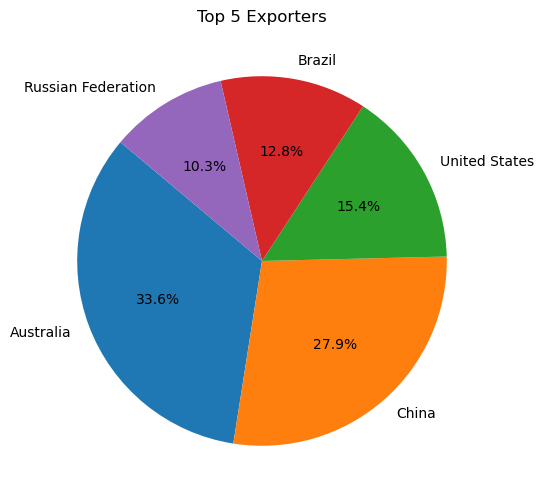

In [12]:
# pie chart of the top 10 exporters

top_exporters = data.groupby('country')['export'].sum().sort_values(ascending=False).head(5)
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(top_exporters.values, labels=top_exporters.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Exporters')
plt.show()

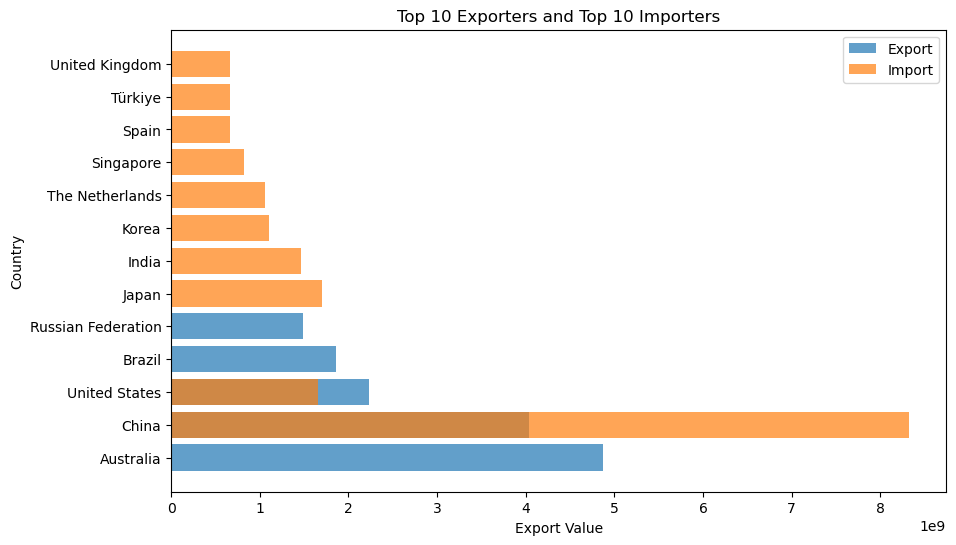

In [16]:
# Ensure top_importers is defined
top_importers = data.groupby('country')['import'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_exporters.index, top_exporters.values, alpha=0.7)
ax.barh(top_importers.index, top_importers.values, alpha=0.7)
ax.set_xlabel('Export Value')
ax.set_ylabel('Country')
ax.set_title('Top 10 Exporters and Top 10 Importers')
ax.legend(['Export', 'Import'])

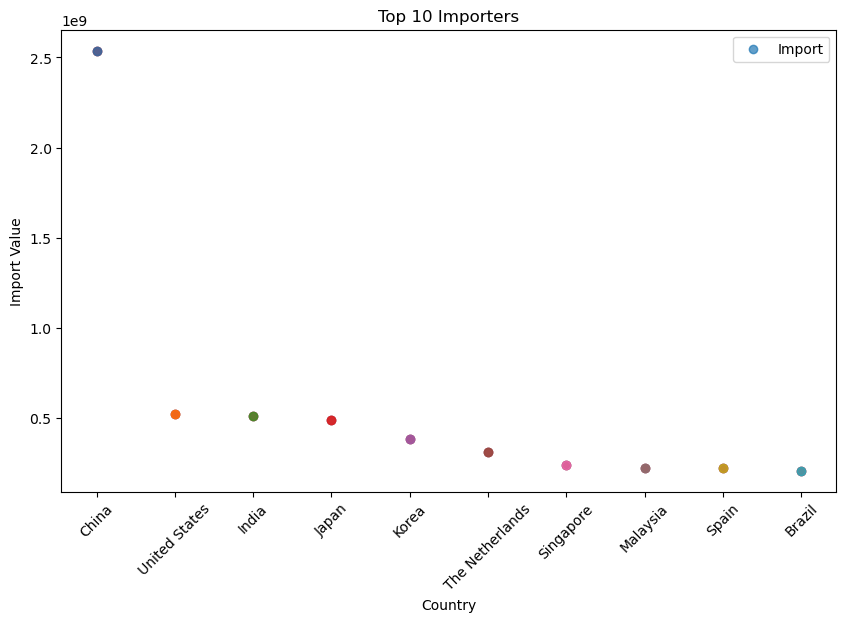

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure top_importers is defined
top_importers = data.groupby('country')['import'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(top_importers.index, top_importers.values, alpha=0.7)
ax.set_xlabel('Country')
ax.set_ylabel('Import Value')
ax.set_title('Top 10 Importers')
plt.xticks(rotation=45)
ax.scatter(top_importers.index, top_importers.values, color='red', alpha=0.7)
colors = plt.cm.tab10(np.linspace(0, 1, len(top_importers)))
for i, (country, value) in enumerate(top_importers.items()):
    ax.scatter(country, value, color=colors[i], alpha=0.7)
ax.legend(['Import'])
plt.show()

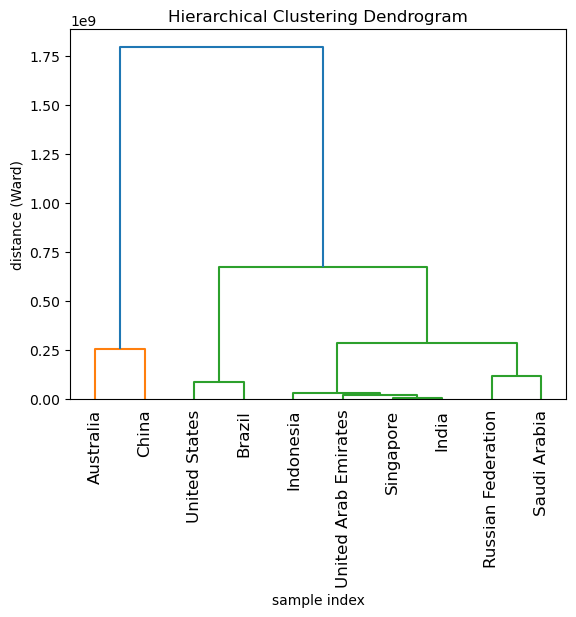

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(top_exporters.values.reshape(-1, 1), method='ward')

# Plot title
plt.title('Country Clustering Dendrogram')

# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')

# Make the dendrogram
dendrogram(Z, labels=top_exporters.index, leaf_rotation=90)

# Show the graph
plt.show()

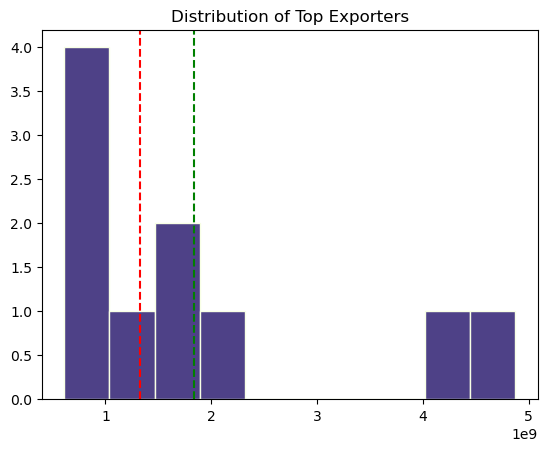

In [ ]:
#  histogram of the top exporters
plt.hist(top_exporters, color = '#4e4187', edgecolor = '#f8ffe5',bins = 10)
plt.axvline(top_exporters.mean(), color = 'g', linestyle = 'dashed')
plt.axvline(top_exporters.median(), color = 'r', linestyle = 'dashed')
plt.title('Distribution of Top Exporters')
plt.show()

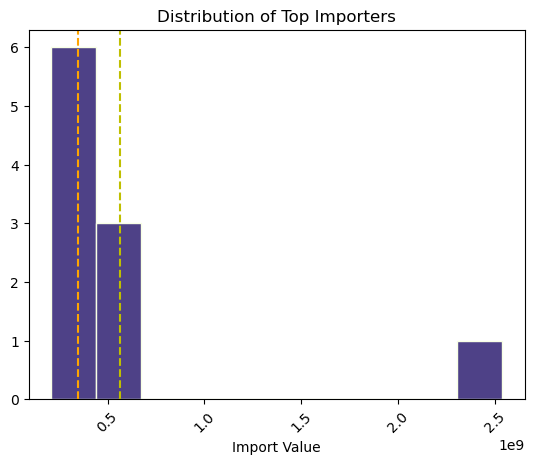

In [ ]:
# histogram of the top importers
top_importers = data.groupby('country')['import'].sum().sort_values(ascending=False).head(10)
plt.hist(top_importers, color = '#4e4187', edgecolor = '#f8ffe5', bins = 10)
plt.axvline(top_importers.mean(), color = 'y', linestyle = 'dashed')
plt.axvline(top_importers.median(), color = 'orange', linestyle = 'dashed')
#plt.xlim(-0.5, 3.5)
#plt.ylim(0, 500)
plt.xlabel('Import Value')
plt.xticks(rotation=45)
plt.title('Distribution of Top Importers')
plt.show()